# Answer to the Seedbox Technical Test - By Harold Castillo

## Importing Libraries

In [ ]:
##Importing pandas (to provide indexing structure and data manipulation functionality) 
##Numpy (for any mathematical operation)
##and matplotlib (to create plots and improve visualization of the data analysis)  

In [6]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

##### Reading data

In [8]:
test = pd.read_csv ("testSamples.csv")
trans = pd.read_csv ("transData.csv")

##### Examine data

###### File 1 - testSamples - List of unique users in the A/B test

In [9]:
# test.shape ##checking for dimensions (rows and columns match initial description before loading data)
# test.dtypes ##checking for data types
# test.columns ##checking column names
# test.head(100) ##checking the headers and the data as well
test.describe() ##Look at the summary info
##Checking for unique and duplicated values and their frequency
# test[["test_group"]]
# len(test["test_group"].unique())
# test["test_group"].nunique()
# test["test_group"].unique() 
# test["test_group"].value_counts()

,sample_id,test_group
count,59721.00000,59721.000000
mean,29861.00000,0.248405
std,17240.11205,0.432092
min,1.00000,0.000000
25%,14931.00000,0.000000
50%,29861.00000,0.000000
75%,44791.00000,0.000000
max,59721.00000,1.000000


In [112]:
test["sample_id"].value_counts()
test["test_group"].value_counts()

0    44886
1    14835
Name: test_group, dtype: int64

In [118]:
test['test_group'].value_counts().loc[0]/len(test["sample_id"].value_counts())

0.751594916361079

In [119]:
test['test_group'].value_counts().loc[1]/len(test["sample_id"].value_counts())

0.24840508363892097

array([[<AxesSubplot:title={'center':'test_group'}>]], dtype=object)

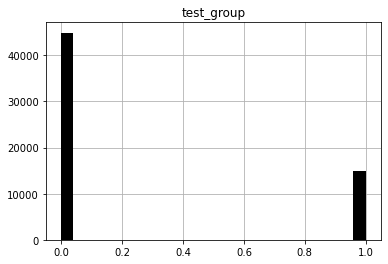

In [120]:
#Try simple histogram from pandas for visualization
test.hist(column='test_group', bins=25, grid=True, figsize=(6,4), color='#000000', zorder=8, rwidth=2)

In [152]:
#### Preliminary Overview
#Number of Members by Testing Group - We have a 75/25 population distribution between control and test group
numgroup=test.groupby(['test_group'])['sample_id'].nunique()
print(numgroup)

test_group
0    44886
1    14835
Name: sample_id, dtype: int64


In [11]:
test.isnull()

,sample_id,test_group
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
59716,False,False
59717,False,False
59718,False,False
59719,False,False


###### File 2 - transData - List of transactions

In [ ]:
# trans.shape ##checking for dimensions (rows and columns match initial description before loading data)
# trans.dtypes ##checking for data types
# trans.columns ##checking column names
# trans.head(100) ##checking the headers and the data as well
# trans.describe() ##Look at the summary info
# ##Checking for unique and duplicated values and their frequency
# trans[["transaction_id"]]
# len(trans["transaction_type"].unique())
# trans["transaction_type"].nunique()
# trans["transaction_type"].unique() 
# trans["transaction_type"].value_counts()
# trans.info()

In [146]:
trans.shape ##checking for dimensions (rows and columns match initial description before loading data)

(7430, 4)

In [12]:
trans["sample_id"].value_counts()

5493     22
11424    19
50361    18
24907    18
31411    18
         ..
27960     1
27943     1
27942     1
27938     1
59694     1
Name: sample_id, Length: 2714, dtype: int64

In [122]:
#Checking duplicates - Several subscribers have more than one transaction - What is the proportion between control and st group?
trans["sample_id"].nunique()

2714

In [ ]:
#trans.dtypes ##checking new data type
trans.info()

In [ ]:
trans.isnull()

In [13]:
trans.isnull().sum()

transaction_id        0
sample_id             0
transaction_type      0
transaction_amount    0
dtype: int64

###### Join - testSample & transData - Creating a DataFrame

In [14]:
# Performed an inner join to capture the subscribers from the main sample list whose transactions wer recorded
master = pd.merge(trans, test, on='sample_id', how='inner')

In [62]:
# master.shape ##checking for dimensions (rows and columns match initial description before loading data)
# master.columns ##checking column names
# master.head(1000) ##checking the headers and the data as well
# master.describe() ##Look at the summary info
##Checking for unique and duplicated values and their frequency
# master[["test_group"]]
# master(test["test_group"].unique())
# masterv["test_group"].nunique()
# master["test_group"].unique() 
# master["test_group"].value_counts()
master.info()
master

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7430 entries, 0 to 7429
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      7430 non-null   int64  
 1   sample_id           7430 non-null   int64  
 2   transaction_type    7430 non-null   object 
 3   transaction_amount  7430 non-null   float64
 4   test_group          7430 non-null   int64  
 5   AB_Group            7430 non-null   object 
 6   Rebilled_Or_not     7430 non-null   uint8  
dtypes: float64(1), int64(3), object(2), uint8(1)
memory usage: 413.6+ KB


,transaction_id,sample_id,transaction_type,transaction_amount,test_group,AB_Group,Rebilled_Or_not
0,52346326,11,REBILL,24.95,1,B,1
1,52346327,11,REBILL,24.95,1,B,1
2,52346328,32,REBILL,29.95,1,B,1
3,52346329,32,REBILL,29.95,1,B,1
4,52346330,32,REBILL,29.95,1,B,1
...,...,...,...,...,...,...,...
7425,52353751,59654,REBILL,39.95,1,B,1
7426,52353752,59654,REBILL,39.95,1,B,1
7427,52353753,59689,REBILL,24.95,0,A,1
7428,52353754,59689,REBILL,24.95,0,A,1


In [133]:
#Checking for duplicates - Keeping same probability distribution in the sutdy sample?
master["sample_id"].nunique(),master["sample_id"].count()

(2714, 7430)

array([[<AxesSubplot:title={'center':'test_group'}>]], dtype=object)

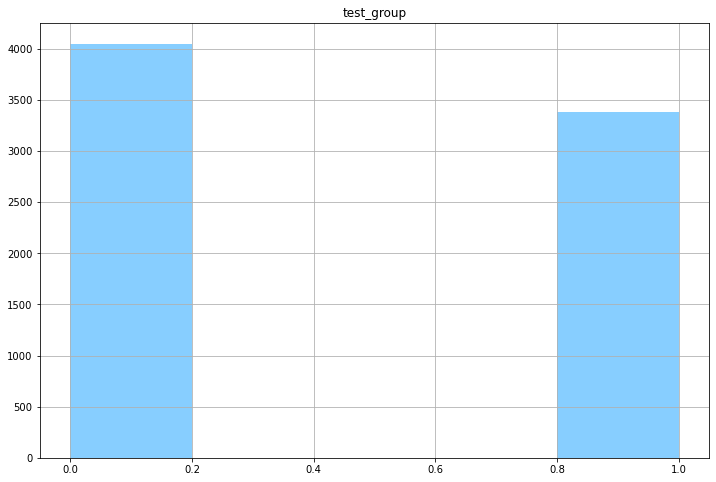

In [145]:
##checking distribution of control and test group - Duplicates or not? - Yes
master.hist(column="test_group",bins=5, grid=True, figsize=(12,8), color='#87CEFF', zorder=1, rwidth=4)

array([[<AxesSubplot:title={'center':'sample_id'}>]], dtype=object)

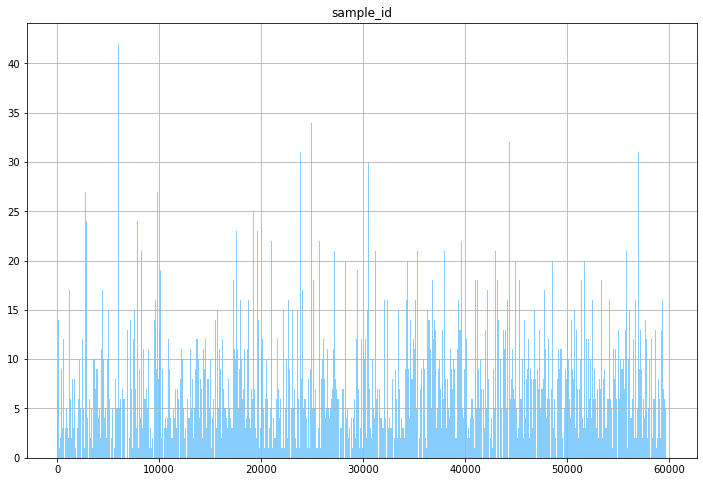

In [136]:
##checking distribution sample_id - Duplicates or not? - Yes
master.hist(column="sample_id",bins=1000, grid=True, figsize=(12,8), color='#87CEFF', zorder=1, rwidth=4)

###### Analysis

In [18]:
#searching for duplicates and its meaning
master['sample_id'].duplicated().value_counts()

True     4716
False    2714
Name: sample_id, dtype: int64

In [149]:
#Population distribution changed from 75/25 to 40/60 - You have more samples from the test group than control group
master.groupby(['test_group'])['sample_id'].nunique()

test_group
0    1079
1    1635
Name: sample_id, dtype: int64

In [138]:
#Samples without duplicated sample_id's 
sample_nd=master.groupby(['transaction_type'])['sample_id'].value_counts()

In [28]:
sample_nd # Total number of clients

transaction_type
CHARGEBACK      82
REBILL        2497
REFUND         146
Name: sample_id, dtype: int64

In [135]:
sample_nd.sum() # Still counting duplicates

2725

In [20]:
#checking the amount of transactions by type and with or without duplicates  - Test Group
# master.groupby(master['test_group']==1)['sample_id'].nunique()
# master[master['test_group'] == 1]['transaction_type'].value_counts()
# master[master['test_group'] == 1]['transaction_type'].value_counts().loc['REBILL']
master[master['test_group'] == 1]['transaction_type'].value_counts()

REBILL        3205
REFUND         118
CHARGEBACK      57
Name: transaction_type, dtype: int64

In [48]:
master[master['test_group'] == 1].groupby('transaction_type')['sample_id'].nunique()

transaction_type
CHARGEBACK      29
REBILL        1556
REFUND          58
Name: sample_id, dtype: int64

In [166]:
#checking the amount of transactions by type and with or without duplicates  - Control Group
master[master['test_group'] == 0]['transaction_type'].value_counts()
# master[master['test_group'] == 0]['transaction_type'].

REBILL        3756
REFUND         188
CHARGEBACK     106
Name: transaction_type, dtype: int64

In [178]:
master[master['test_group'] == 0].groupby(['transaction_type'])['sample_id'].nunique()

transaction_type
CHARGEBACK     53
REBILL        941
REFUND         88
Name: sample_id, dtype: int64

In [186]:
#Separating objects to prepare for ratio calculations - Weighing the use of unique counting vs duplicated in both groups
len(master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['REBILL'])

941

In [184]:
len(master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK'])

53

In [187]:
len(master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['REFUND'])

88

In [190]:
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['REBILL'])

1556

In [189]:
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK'])

29

In [188]:
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['REFUND'])

58

In [ ]:
#Calculating ratios

In [193]:
#master['sample_id'].nunique()
# master['test_group'].count()
# master[master['test_group'] == 0]['transaction_type'].value_counts().loc['REBILL']
master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].count().loc['CHARGEBACK'] / \
master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].count().loc['REBILL']

0.028221512247071354

In [199]:
master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].count().loc['REFUND'] / \
master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].count().loc['REBILL']

0.05005324813631523

In [194]:
# master[master['test_group'] == 1]['transaction_type'].value_counts().loc['REBILL']
master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].count().loc['CHARGEBACK'] / \
master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].count().loc['REBILL']

0.017784711388455537

In [200]:
master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].count().loc['REFUND'] / \
master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].count().loc['REBILL']

0.036817472698907956

In [36]:
# master[master['test_group']==1]['transaction_type'].value_counts().loc['CHARGEBACK']/ \
# master[master['test_group'] == 1]['transaction_type'].value_counts().loc['REBILL']
len(master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK'])/ \
len(master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['REBILL'])

0.0563230605738576

In [195]:
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK'])/ \
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['REBILL'])

0.018637532133676093

In [180]:
master[master['test_group'] == 0].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK']

sample_id
37745    8
37051    7
4446     4
37320    4
40836    4
44438    4
19331    3
26099    3
45149    3
48793    3
50123    3
50349    3
53525    3
56021    3
2713     2
15223    2
18430    2
21596    2
21898    2
27317    2
31763    2
34631    2
46422    2
50202    2
50847    2
54326    2
2035     1
2192     1
3458     1
8106     1
9607     1
11538    1
13030    1
13408    1
15677    1
17352    1
21614    1
23050    1
24982    1
25532    1
25580    1
26361    1
26409    1
27378    1
38325    1
38450    1
42124    1
42413    1
47935    1
50424    1
53423    1
53818    1
56210    1
Name: sample_id, dtype: int64

In [35]:
# master[master['test_group']==0]['transaction_type'].value_counts().loc['CHARGEBACK']/ \
# master[master['test_group'] == 0]['transaction_type'].value_counts().loc['REBILL']
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['CHARGEBACK'])/ \
len(master[master['test_group'] == 1].groupby(["transaction_type"])['sample_id'].value_counts().loc['REBILL'])

0.018637532133676093

In [96]:
#master
master[master['transaction_amount'] > 0].groupby(['test_group'])['transaction_amount'].sum()
#master.groupby('sample_id')['transaction_type'].value_counts()

test_group
0     97359.20
1    100869.75
Name: transaction_amount, dtype: float64

In [174]:
master[master['transaction_amount'] > 0].groupby(['test_group'])['transaction_amount'].value_counts()

test_group  transaction_amount
0           24.95                 1368
            32.95                 1199
            19.95                 1189
1           24.95                 1124
            39.95                 1050
            29.95                 1031
Name: transaction_amount, dtype: int64

In [205]:
master[master['transaction_amount'] > 0].groupby(['test_group'])['transaction_amount'].value_counts().max()

1368

In [155]:
master[master['transaction_amount'] > 0].groupby(['test_group'])['sample_id'].nunique()

test_group
0     941
1    1556
Name: sample_id, dtype: int64

In [111]:
master[master['transaction_amount'] > 0].groupby(['test_group'])['transaction_id'].count()

test_group
0    3756
1    3205
Name: transaction_id, dtype: int64

In [183]:
master[master['transaction_amount'] < 0].groupby(['test_group'])['transaction_amount'].sum()

test_group
0   -7520.30
1   -5436.25
Name: transaction_amount, dtype: float64

In [175]:
master[master['transaction_amount'] < 0].groupby(['test_group'])['transaction_amount'].value_counts()

test_group  transaction_amount
0           -19.95                107
            -24.95                 97
            -32.95                 90
1           -29.95                 64
            -24.95                 61
            -39.95                 50
Name: transaction_amount, dtype: int64

In [170]:
master[master['transaction_amount'] < 0].groupby(['test_group'])['sample_id'].nunique()

test_group
0    141
1     87
Name: sample_id, dtype: int64

In [172]:
master[master['transaction_amount'] < 0].groupby(['test_group'])['transaction_id'].count()

test_group
0    294
1    175
Name: transaction_id, dtype: int64

array([[<AxesSubplot:title={'center':'transaction_amount'}>]],
      dtype=object)

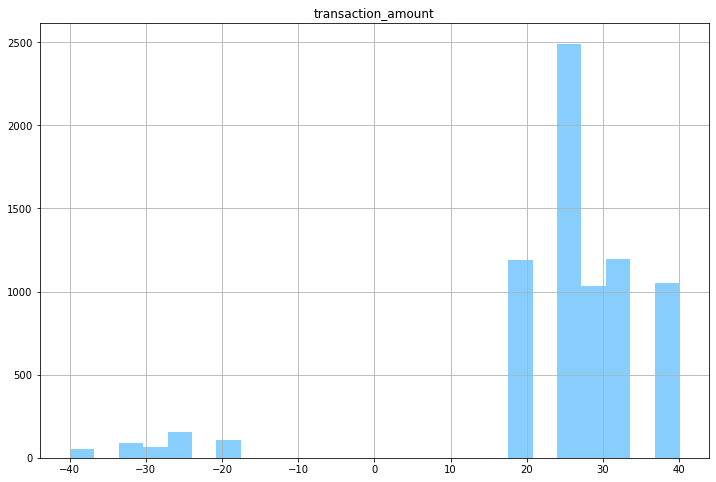

In [141]:
##checking distribution of refunds, chargebacks and rebills
master.hist(column='transaction_amount',bins=25, grid=True, figsize=(12,8), color='#87CEFF', zorder=1, rwidth=4)

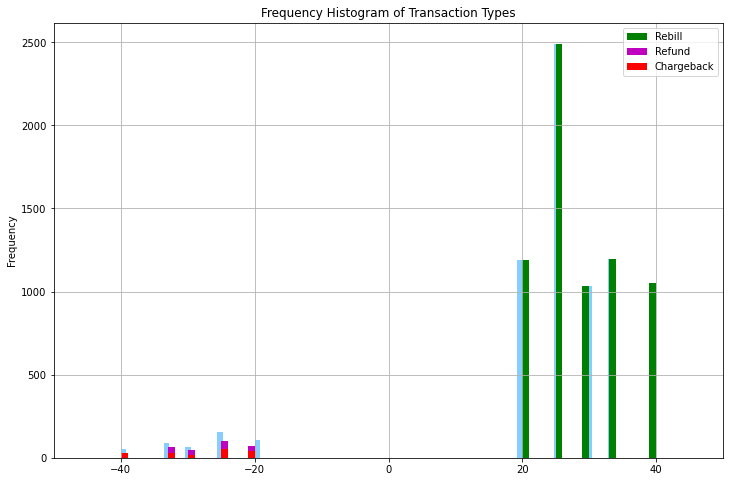

In [157]:
master.hist(column='transaction_amount',bins=100, grid=True, figsize=(12,8), color='#87CEFF', zorder=0.5, rwidth=2)
x1=master.loc[master.transaction_type=='REBILL','transaction_amount']
x2=master.loc[master.transaction_type=='REFUND','transaction_amount']
x3=master.loc[master.transaction_type=='CHARGEBACK','transaction_amount']
kwargs=dict(alpha=1, bins=20)
plt.hist(x1, **kwargs, color='g', label='Rebill')
plt.hist(x2, **kwargs, color='m', label='Refund')
plt.hist(x3, **kwargs, color='r', label='Chargeback')
plt.gca().set(title='Frequency Histogram of Transaction Types', ylabel='Frequency')
#plt.ylim(0,2500)
plt.xlim(-50,50)
plt.legend();

##### Questions & Answers
##### 1. What is the approximate probability distribution between the test group and the control group
Initially, from the table 'testSamples.csv', we get a 75/25. Meaning you are more likely pick a person from the control group than the test group. Three quarters (3/4) of the population is in the control group and one quarter (1/4) in the test group. 

After analyzing table transData.csv, the distribution is inverted and now we have a 40/60 split, meaning two fifths (2/5) of the population from the control group and three fifths (3/5) in the test group. The whole dataset 7430 entries correspond to 2714 unique subscribers with multiple transactions, which represents 4% of the total sample involved in the test. The control group with provided transactions represents 2.4% of the original control group and the test group with transactions is about 11% of the original sample population.

##### 2. Is a user that must call-in to cancel more likely to generate at least 1 additional REBILL

No, but if we could find more information about both groups, will this change? 

From my observations, the Control group (0) with 941 subscribers generated 3756 positive transactions for a total of 97359.20 in REBILLS. 141 subscribers who left, translated into 294  cancellations for a total of -7520.30, (REFUNDS and CHARGEBACKS together). 

The must call-in or Test group (1), on the other hand, with 1556 subscribers, generated 100869.75 from 3205 REBILLS. 87 subscribers cancelled, generated 175 negative transactions for a total of -5436.25. The test group did not generate more rebills but it did not generate more refunds or chargebacks.

The control group offers more positive transactions with less subscribers, but the ones that called-in generated more revenue.
     

##### 3. Is a user that must call-in to cancel more likely to generate more revenues?

According to the information provided, that seems to be the case. The test group generated more revenue with less transactions thanks to more subscriptions of 39.95. The control group had more 19.95 subscriptions. Furthermore, those who must call recorded less cancellations.

##### 4. Is a user that must call-in more likely to produce a higher chargeback rate (CHARGEBACKs/REBILLs)?

This is a great question because it exposes the great power of ratios and the relationships you can find in the data.  The plain answer is no, according to the ratios calculated above; Control shows 0.0563 versus Test with 0.0186. Meaning that, by creation a situation where the customer must call, the chargebacks are lower.

This is only considering unique clients (unique sample_id) but when you consider the aggregation behind each transaction you get a slightly different result.

When considering duplicates in the transactions, Control group rate goes down 0.0282 and Test group remains almost unchanged 0.0177. I interpret this change as an increase of chargebacks in the control group but a more consistent trend in the test group reflects that it reduces the trend of cancellations or at the very least it does not generate the opposite of the intended effect.    

##### Suggestions and additional questions
- To draw better conclusions, I would analyze the transactions for the whole sample.

- I would request additional biometric information for client segmentation analysis and I would also include date/time information to analyze seasonality.

- It would also be interesting to know the web interactions to determine what other KPI's can help understand the client and offer other solutions.

- It would help to know the different characteristics of each subscription and the expectations of each subscriber. It seems like there are 5 different types of subscription, would the company benefit if they had less types of subscriptions?

- I would like to know the design of the script for those who had to call and check if there was a survey for those who left and perform a sentiment analysis. 

- For those who remained subscribed, were they offered an upgrade or any other type of deal? where is the value placed? subscribers in the control group preferred the 19.95 by majority, why? Interesting question to answer when mora data is available. 